### EDA

#### Import zone

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

#### Import Clean CSV files

##### Clean CSV for concat file df_concat_final_web_data that comes from: df_final_web_data_pt_1, df_final_web_data_pt_2

In [2]:
df_concat_final_web_data = pd.read_csv('C:/Users/user/Jupyter/IronHack/Work_Python/Week5/MiniProject/df_concat_final_web_data.csv',sep=';')

##### Clean csv file for: df_final_experiment_clients

In [3]:
df_final_experiment_clients = pd.read_csv('C:/Users/user/Jupyter/IronHack/Work_Python/Week5/MiniProject/df_final_experiment_clients.csv',sep=';')

##### Clean csv file for: df_final_demo

In [4]:
df_final_demo = pd.read_csv('C:/Users/user/Jupyter/IronHack/Work_Python/Week5/MiniProject/df_final_demo.csv',sep=';')

#### Some previous calculations

##### df_concat_final_web_data

In [5]:
# Display the first few rows of the dataset
df_concat_final_web_data.drop('Unnamed: 0', axis=1, inplace=True)
df_concat_final_web_data.head()

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
df_concat_final_web_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB


In [ ]:
df_concat_final_web_data.shape

(755405, 5)

##### df_final_experiment_clients


In [ ]:
df_final_experiment_clients.drop('Unnamed: 0', axis=1, inplace=True)
df_final_experiment_clients.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [ ]:
df_final_experiment_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50500 entries, 0 to 50499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  50500 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 789.2+ KB


In [ ]:
df_final_experiment_clients.shape

(50500, 2)

##### df_final_demo

In [ ]:
df_final_demo.drop('Unnamed: 0',axis=1,inplace=True)
df_final_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2,45105.30,6,9
1,2304905,7.0,94.0,58.0,U,2,110860.30,6,9
2,1439522,5.0,64.0,32.0,U,2,52467.79,6,9
3,1562045,16.0,198.0,49.0,M,2,67454.65,3,6
4,5126305,12.0,145.0,33.0,F,2,103671.75,0,3


In [ ]:
df_final_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70594 entries, 0 to 70593
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70594 non-null  int64  
 1   clnt_tenure_yr    70594 non-null  float64
 2   clnt_tenure_mnth  70594 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70594 non-null  object 
 5   num_accts         70594 non-null  int64  
 6   bal               70594 non-null  float64
 7   calls_6_mnth      70594 non-null  int64  
 8   logons_6_mnth     70594 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 4.8+ MB


In [ ]:
df_final_demo.shape

(70594, 9)

#### Exploring numerical and categorical variables

##### df_concat_final_web_data

In [ ]:
# Retrieving the unique data types present in the dataframe columns
list(set(df_concat_final_web_data.dtypes.tolist()))

[dtype('int64'), dtype('O')]

In [ ]:
df_concat_final_web_data.nunique()

client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64

In [ ]:
# Extracting column names with numerical data types from the dataframe
df_concat_final_web_data.select_dtypes("number").columns

Index(['client_id'], dtype='object')

In [ ]:
# Counting and sorting the unique values for each numerical column in descending order
df_concat_final_web_data.select_dtypes("number").nunique().sort_values(ascending=False)

client_id    120157
dtype: int64

##### df_final_experiment_clients

In [ ]:
# Retrieving the unique data types present in the dataframe columns
list(set(df_final_experiment_clients.dtypes.tolist()))

[dtype('int64'), dtype('O')]

In [ ]:
df_final_experiment_clients.nunique()

client_id    50500
Variation        2
dtype: int64

In [ ]:
# Extracting column names with numerical data types from the dataframe
df_final_experiment_clients.select_dtypes("number").columns

Index(['client_id'], dtype='object')

In [ ]:
# Counting and sorting the unique values for each numerical column in descending order
df_final_experiment_clients.select_dtypes("number").nunique().sort_values(ascending=False)

client_id    50500
dtype: int64

##### df_final_demo

In [ ]:
# Retrieving the unique data types present in the dataframe columns
list(set(df_final_demo.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [ ]:
df_final_demo.nunique().sort_values(ascending=False)

client_id           70594
bal                 70321
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
gendr                   3
dtype: int64

In [ ]:
# Extracting column names with numerical data types from the dataframe
df_final_demo.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [ ]:
# Counting and sorting the unique values for each numerical column in descending order
df_final_demo.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           70594
bal                 70321
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

### Univariate

#### Categorical

##### df_concat_final_web_data

In [ ]:
#  3   process_step  755405 non-null  object - Categorical

**Rankin and proportions**

In [ ]:
process_step_counts = df_concat_final_web_data['process_step'].value_counts().sort_values(ascending=False)
process_step_normalized_counts = df_concat_final_web_data['process_step'].value_counts(normalize=True).round(2).sort_values(ascending=False)
print(f'Rankin: {process_step_counts}, \nProportions: {process_step_normalized_counts}')

Rankin: process_step
0_start      243945
1_step_1     163193
2_step_2     133062
3_step_3     112242
4_confirm    102963
Name: count, dtype: int64, 
Proportions: process_step
0_start      0.32
1_step_1     0.22
2_step_2     0.18
3_step_3     0.15
4_confirm    0.14
Name: proportion, dtype: float64


**Bar plot**

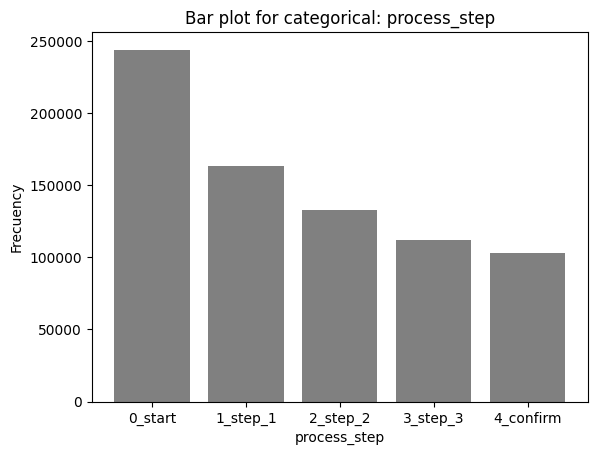

In [ ]:
# Plotting a bar chart using the 'process_step' values
plt.bar(df_concat_final_web_data['process_step'].value_counts().index, df_concat_final_web_data['process_step'].value_counts(), color='grey')
plt.xlabel('process_step')
plt.ylabel('Frecuency')
plt.title('Bar plot for categorical: process_step')
plt.show()

##### df_final_experiment_clients

In [ ]:
#  1   Variation  50500 non-null  object - Categorical

**Ranking and Proportions**

In [ ]:

variation_counts = df_final_experiment_clients['Variation'].value_counts().sort_values(ascending=False)
variation_normalized_counts = df_final_experiment_clients['Variation'].value_counts(normalize=True).round(2).sort_values(ascending=False)
print(f'Rankin: {variation_counts}, \nProportions: {variation_normalized_counts}')

Rankin: Variation
Test       26968
Control    23532
Name: count, dtype: int64, 
Proportions: Variation
Test       0.53
Control    0.47
Name: proportion, dtype: float64


**Bar plot**

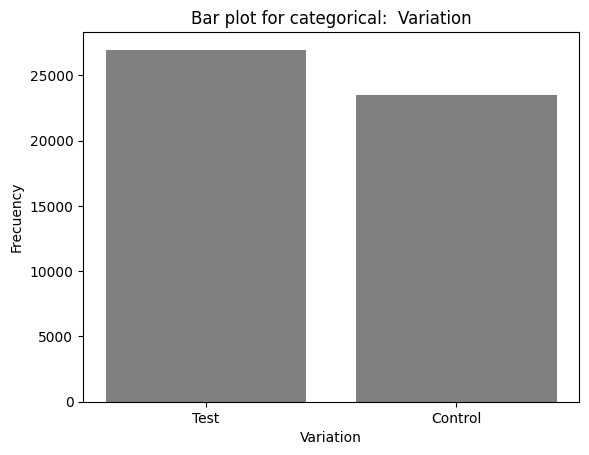

In [ ]:
# Plotting a bar chart using the 'Variation' values
plt.bar(df_final_experiment_clients['Variation'].value_counts().index, df_final_experiment_clients['Variation'].value_counts(), color='grey')
plt.xlabel('Variation')
plt.ylabel('Frecuency')
plt.title('Bar plot for categorical:  Variation')
plt.show()

##### df_final_demo

In [ ]:
#  0   client_id         70594 non-null  int64 - Categorical 
#  4   gendr             70594 non-null  object - Categorical

In [ ]:
gendr_counts = df_final_demo['gendr'].value_counts().sort_values(ascending=False)
gendr_normalized_counts = df_final_demo['gendr'].value_counts(normalize=True).round(2).sort_values(ascending=False)
print(f'Rankin: {gendr_counts}, \nProportions: {gendr_normalized_counts}')


Rankin: gendr
U    24125
M    23724
F    22745
Name: count, dtype: int64, 
Proportions: gendr
U    0.34
M    0.34
F    0.32
Name: proportion, dtype: float64


**Bar plot**

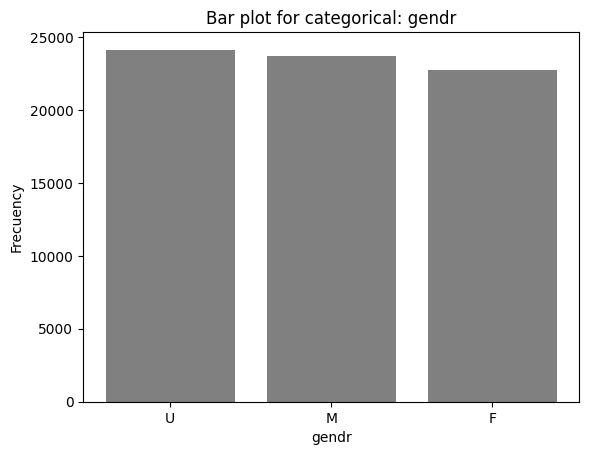

In [ ]:
# Plotting a bar chart using the 'gendr' values
plt.bar(df_final_demo['gendr'].value_counts().index, df_final_demo['gendr'].value_counts(), color='grey')
plt.xlabel('gendr')
plt.ylabel('Frecuency')
plt.title('Bar plot for categorical: gendr')
plt.show()

#### Numerical

##### df_concat_final_web_data

In [ ]:
#  4   date_time     755405 non-null  object - Numerical

##### df_final_demo_numericals

In [ ]:
#  1   clnt_tenure_yr    70594 non-null  float64 - Numerical
#  2   clnt_tenure_mnth  70594 non-null  float64 - Numerical
#  3   clnt_age          70594 non-null  float64 - Numerical
#  5   num_accts         70594 non-null  float64 - Numerical
#  6   bal               70594 non-null  float64 - Numerical
#  7   calls_6_mnth      70594 non-null  float64 - Numerical
#  8   logons_6_mnth     70594 non-null  float64 - Numerical

**Summary of measures of centrality and dispersion**

In [ ]:
df_final_demo_numericals = df_final_demo.select_dtypes("number")
df_final_demo_numericals.drop('client_id',axis=1,inplace=True)
df_final_demo_numericals.describe().round(2)

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,70594.00,70594.00,70594.00,70594.00,70594.00,70594.00,70594.00
mean,12.05,150.66,46.44,2.26,147446.73,3.38,5.57
std,6.87,82.09,15.59,0.53,301510.58,2.24,2.35
min,2.00,33.00,13.50,1.00,13789.42,0.00,1.00
25%,6.00,82.00,32.50,2.00,37346.60,1.00,4.00
50%,11.00,136.00,47.00,2.00,63334.59,3.00,5.00
75%,16.00,192.00,59.00,2.00,137546.12,6.00,7.00
max,62.00,749.00,96.00,8.00,16320040.15,7.00,9.00


**Shape of the Distribution**

In [ ]:
for column in df_final_demo_numericals.columns:
    print(f'{column} - Skew: {df_final_demo_numericals[column].skew()} - Kurtosis: {df_final_demo_numericals[column].kurtosis()}')

clnt_tenure_yr - Skew: 1.0366247018480386 - Kurtosis: 1.0709232170805043
clnt_tenure_mnth - Skew: 1.0506517922170102 - Kurtosis: 1.102446928017626
clnt_age - Skew: 0.08182349158703761 - Kurtosis: -0.9271048487356293
num_accts - Skew: 2.292747357230546 - Kurtosis: 6.093346356731954
bal - Skew: 11.164302129665488 - Kurtosis: 278.2039860394955
calls_6_mnth - Skew: 0.051141800934866845 - Kurtosis: -1.3256714399170726
logons_6_mnth - Skew: -0.03442606117380175 - Kurtosis: -1.0607568785264696


**Histograms**

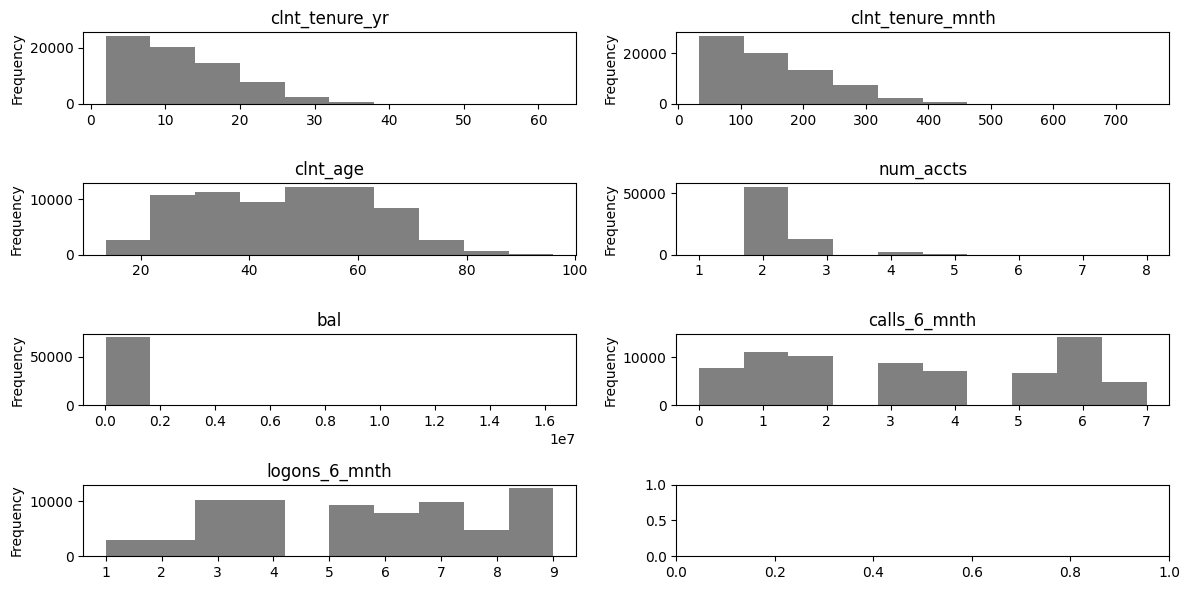

In [ ]:
# Specify the size of the grid
num_plots = len(df_final_demo_numericals.columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Be sure axes is 2 matrix to ensure access
if num_rows == 1:
    axes = [axes]

# Trace each hist in hteir correspondent subplot
for i, col in enumerate(df_final_demo_numericals.columns):
    ax = axes[i // num_cols][i % num_cols]
    df_final_demo_numericals[col].plot(kind='hist', ax=ax, color='grey')
    ax.set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show
plt.show()

**Box plots**

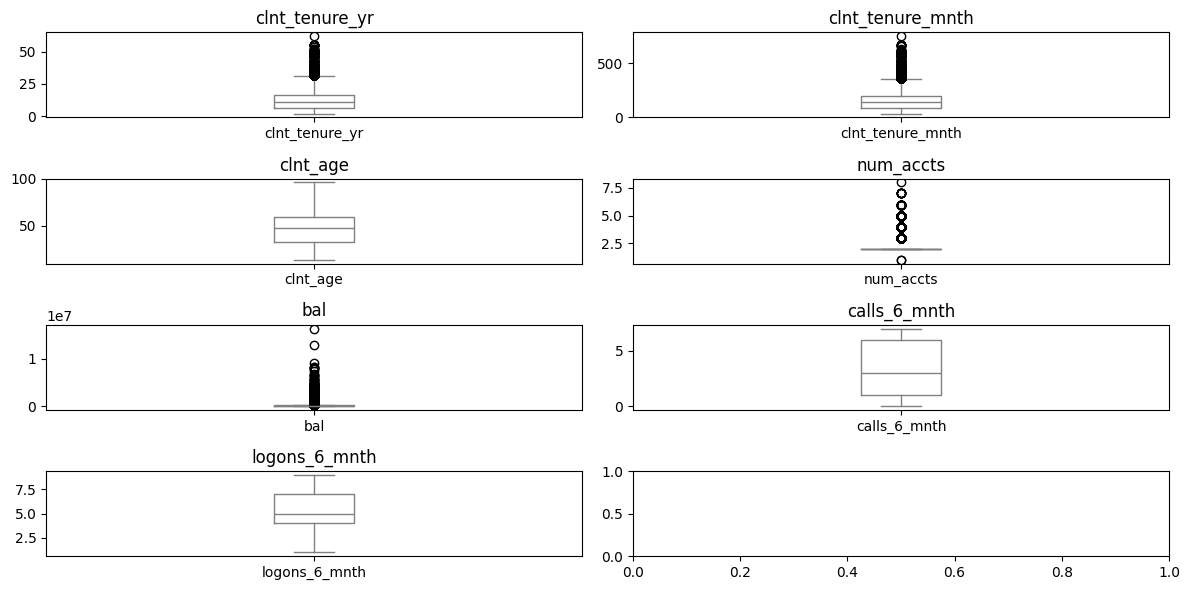

In [ ]:
# Specify the size of the grid
num_plots = len(df_final_demo_numericals.columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Be sure axes is 2 matrix to ensure access
if num_rows == 1:
    axes = [axes]

# Trace each boxplot in hteir correspondent subplot
for i, col in enumerate(df_final_demo_numericals.columns):
    ax = axes[i // num_cols][i % num_cols]
    df_final_demo_numericals[col].plot(kind='box', ax=ax, color='grey')
    ax.set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show
plt.show()

KeyError: 'Type_Main'

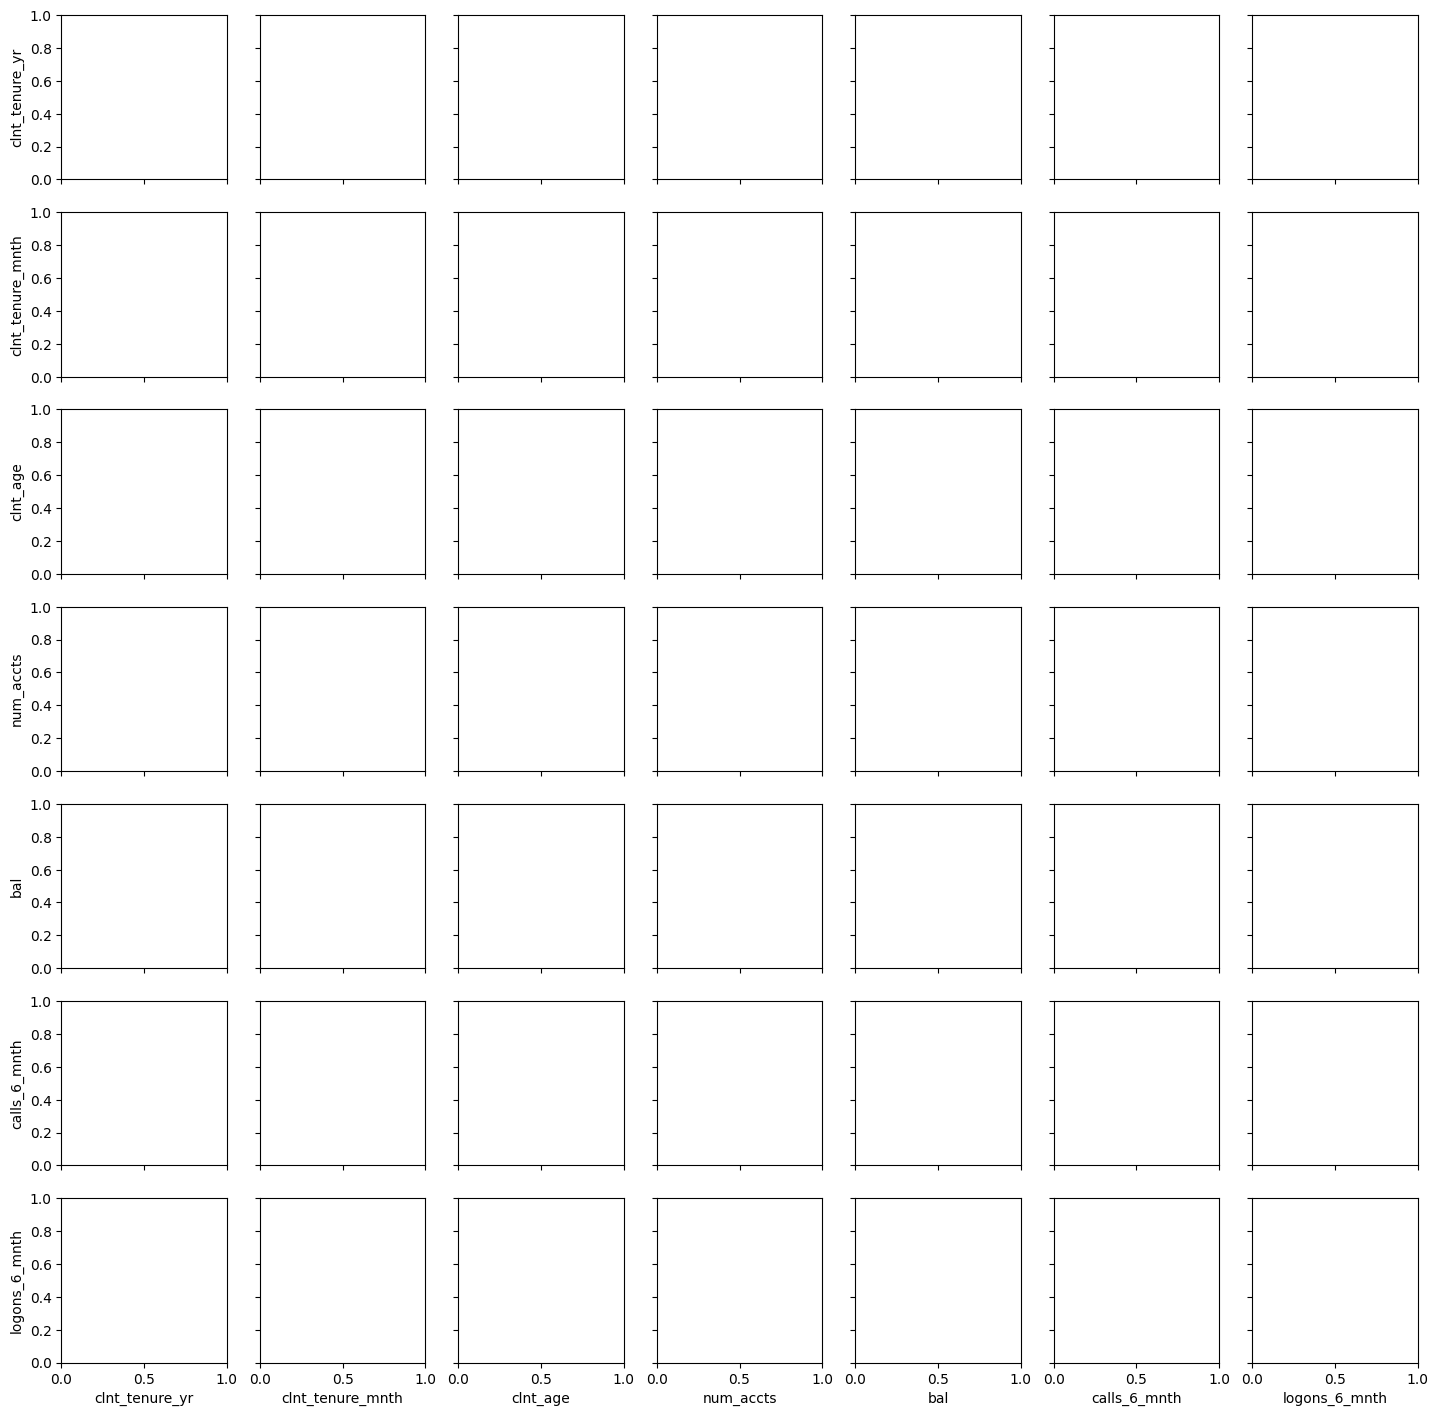

In [ ]:
sns.pairplot(df_final_demo, 
             vars=df_final_demo_numericals.columns,
             hue='Type_Main')
plt.show()

### Bivariate

#### Categorical vs Discrete

##### df_concat_final_web_data

In [ ]:
# Generating a crosstab for 'client_id' and 'process_step'
crosstab_test = pd.crosstab(df_concat_final_web_data['visit_id'].count(), df_concat_final_web_data['process_step'])
crosstab_test

process_step,0_start,1_step_1,2_step_2,3_step_3,4_confirm
row_0,,,,,
755405,243945,163193,133062,112242,102963


In [ ]:
# Generating a crosstab for 'client_id' and 'process_step'
crosstab_result = pd.crosstab(df_concat_final_web_data['client_id'], df_concat_final_web_data['process_step'])
crosstab_result

process_step,0_start,1_step_1,2_step_2,3_step_3,4_confirm
client_id,,,,,
169,1,1,1,1,1
336,2,0,0,0,0
546,1,1,1,1,1
555,1,1,1,1,1
647,1,1,1,1,1
...,...,...,...,...,...
9999729,4,3,2,1,1
9999768,3,3,3,2,1
9999832,1,1,0,0,0


**Chi-square Test**

In [ ]:
# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(264032.7396588276, 1.0)

**Cramer's V**

In [ ]:
# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.2956030888508668

**Stacked and Grouped Bar Charts**

**Frequency Heat Maps**

#### Categorical vs Continuous

##### df_final_demo

C:\Users\user\AppData\Local\Temp\ipykernel_3484\2663686468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_final_demo, x='gendr', y='clnt_tenure_yr', palette="coolwarm")


<Axes: xlabel='gendr', ylabel='clnt_tenure_yr'>

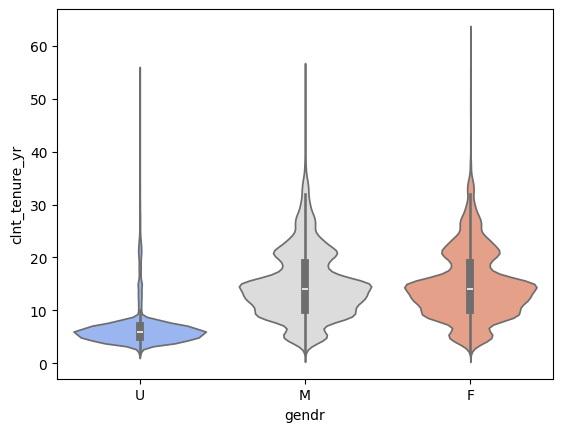

In [ ]:
# Plotting a violin plot to visualize the distribution of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.violinplot(data=df_final_demo, x='gendr', y='clnt_tenure_yr', palette="coolwarm")

C:\Users\user\AppData\Local\Temp\ipykernel_3484\1913357145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final_demo, x='gendr', y='clnt_tenure_yr', palette="Greys")


<Axes: xlabel='gendr', ylabel='clnt_tenure_yr'>

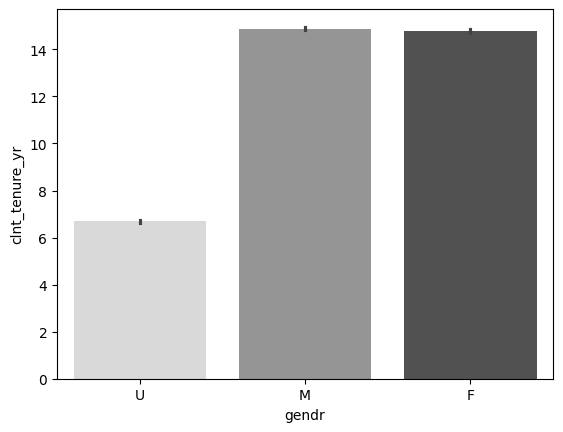

In [ ]:
# Plotting a bar plot to visualize the average 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.barplot(data=df_final_demo, x='gendr', y='clnt_tenure_yr', palette="Greys")

C:\Users\user\AppData\Local\Temp\ipykernel_3484\52431526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final_demo, x='gendr', y='clnt_tenure_yr', palette="coolwarm")


<Axes: xlabel='gendr', ylabel='clnt_tenure_yr'>

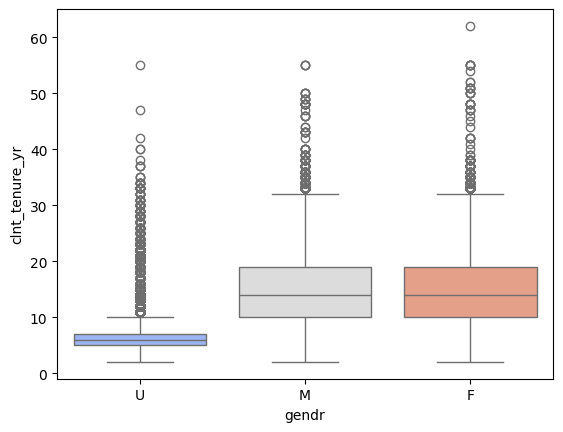

In [ ]:
# Plotting a box plot to visualize the spread and outliers of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.boxplot(data=df_final_demo, x='gendr', y='clnt_tenure_yr', palette="coolwarm")

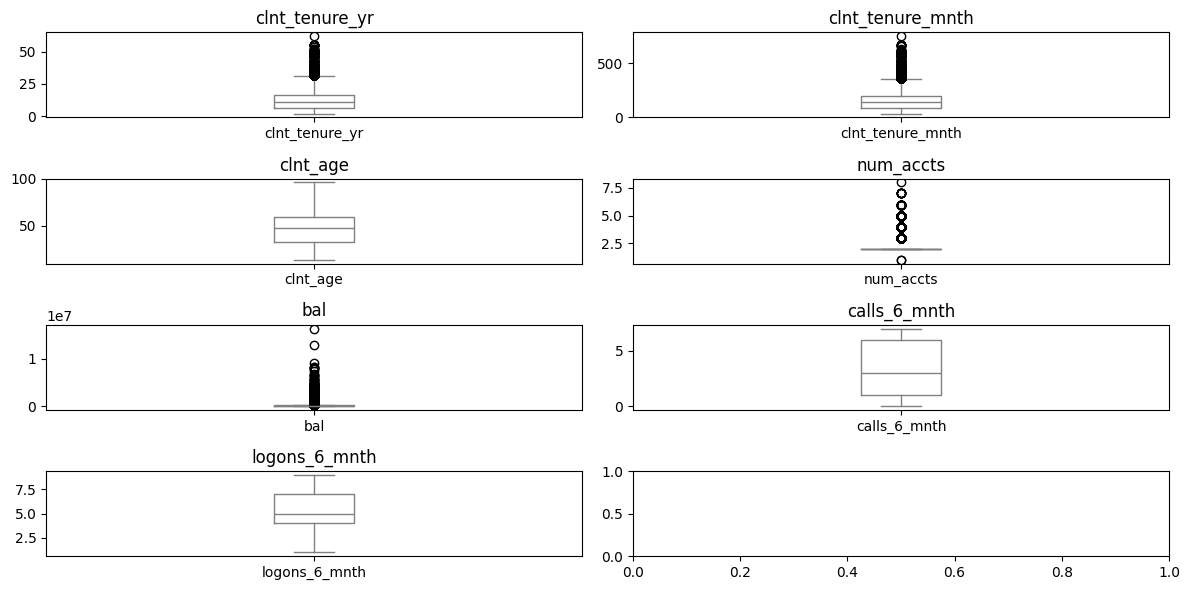

In [ ]:
# Specify the size of the grid
num_plots = len(df_final_demo_numericals.columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Be sure axes is a 2D matrix to ensure access
if num_rows == 1:
    axes = [axes]

# Trace each scatter plot in their corresponding subplot
for i, col in enumerate(df_final_demo_numericals.columns):
    ax = axes[i // num_cols][i % num_cols]
    df_final_demo.plot(kind='box', x='gendr', y=col, ax=ax, color='grey')  
    ax.set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show
plt.show()

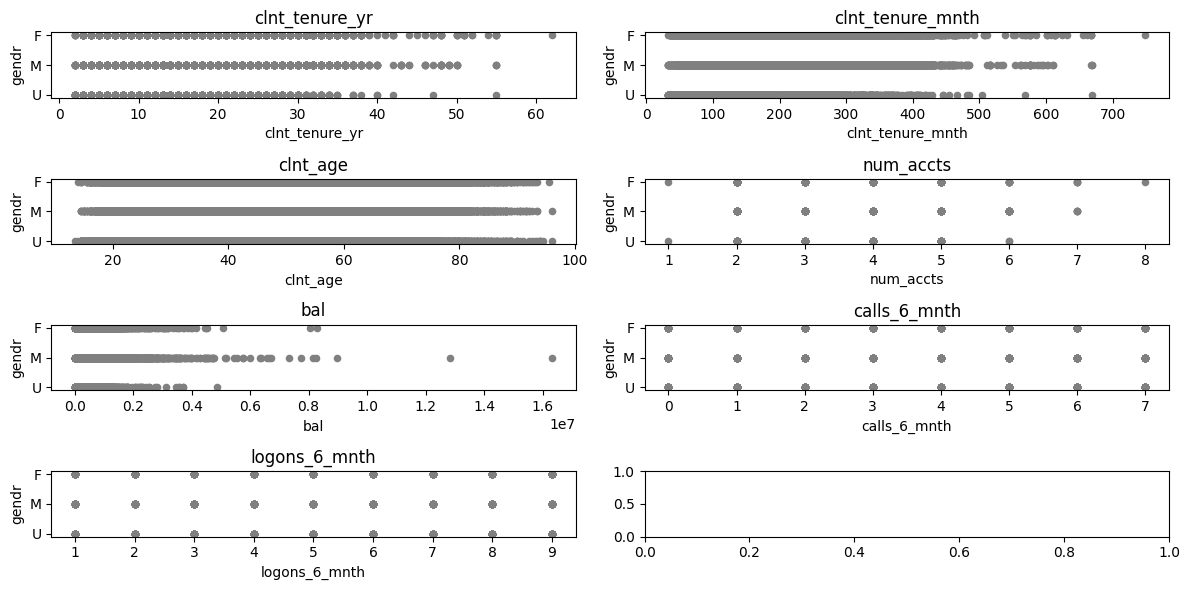

In [ ]:

# Specify the size of the grid
num_plots = len(df_final_demo_numericals.columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Be sure axes is a 2D matrix to ensure access
if num_rows == 1:
    axes = [axes]

# Trace each scatter plot in their corresponding subplot
for i, col in enumerate(df_final_demo_numericals.columns):
    ax = axes[i // num_cols][i % num_cols]
    df_final_demo.plot(kind='scatter', x=col, y='gendr', ax=ax, color='grey')  
    ax.set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show
plt.show()

#### Continuous vs Continuous

##### df_final_demo

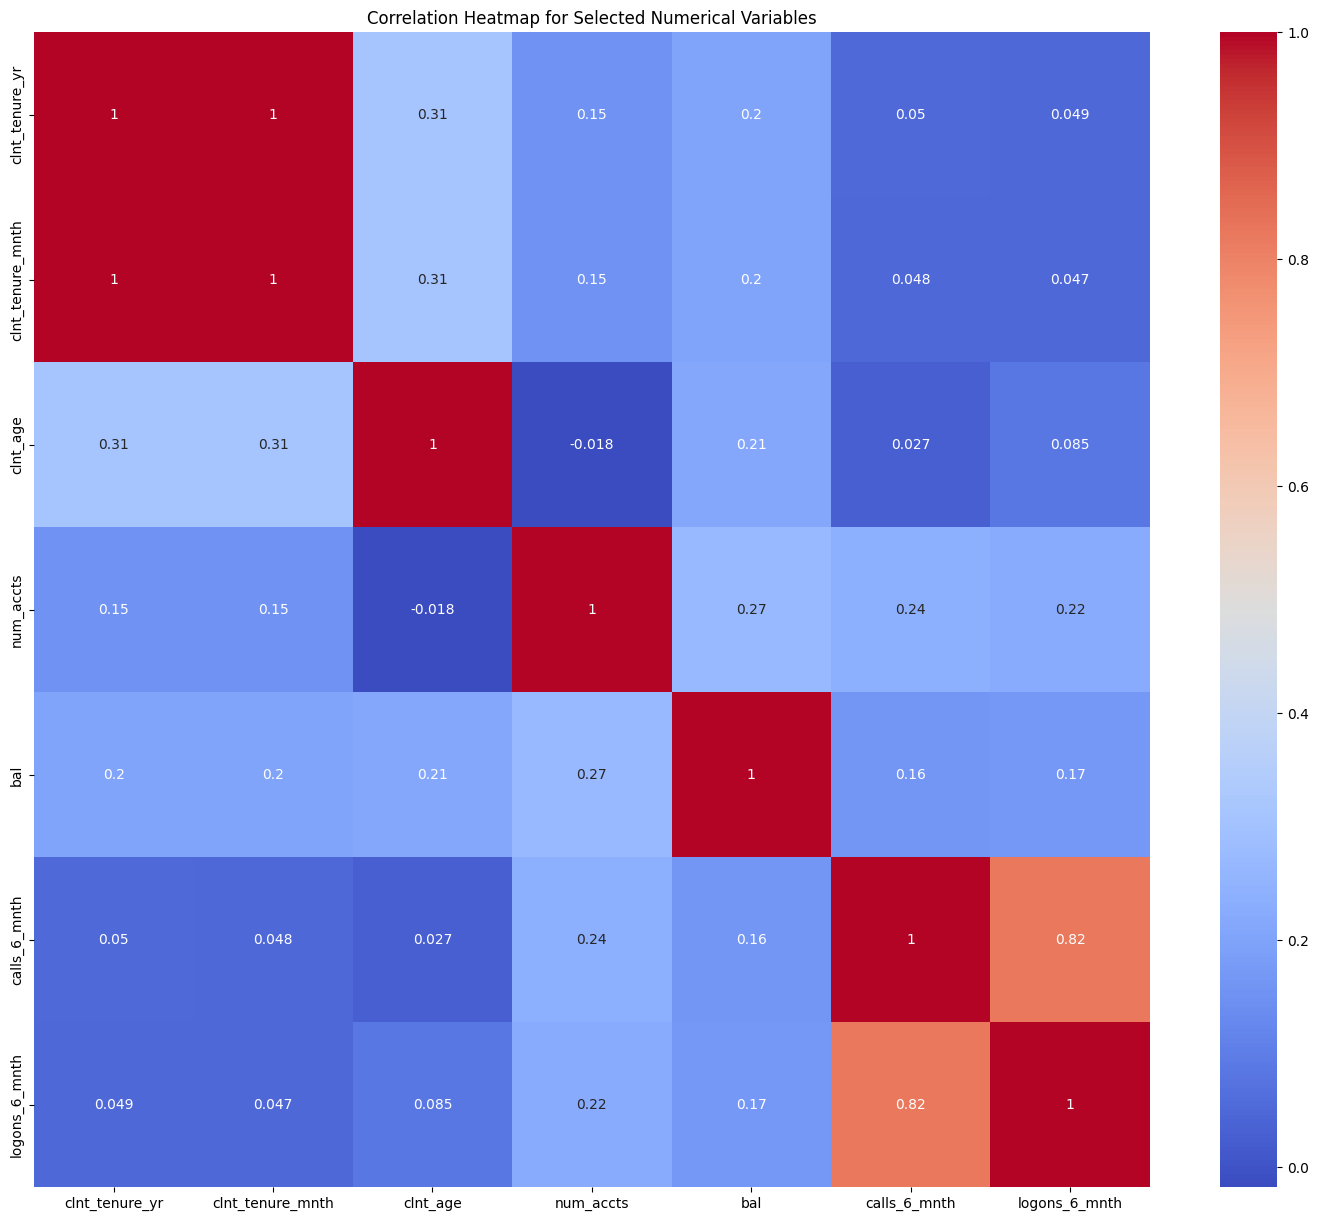

In [ ]:
correlation_matrix = df_final_demo_numericals.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm") # cmap="Greys"

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()